In [1]:
# change dir to root
import os
import sys
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 15


In [2]:
tournaments = [   
                                        'past-french-open-atp-singles', 
                                        'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        'past-madrid-atp-singles',
                                        'past-monte-carlo-atp-singles',
                                        'past-lyon-atp-singles',
                                        'past-barcelona-atp-singles',
                                        'past-munich-atp-singles',
                                        'past-geneva-atp-singles',
                                        'past-estoril-atp-singles',
                                        'past-houston-atp-singles',
                                        'past-marrakech-atp-singles',
                                        'past-bucharest-atp-singles',
                                        'past-doha-atp-singles',
                                        'past-dubai-atp-singles',
                                        'past-indian-wells-atp-singles',
                                        'past-miami-atp-singles',
                                        'past-acapulco-atp-singles',
                                        'past-rio-de-janeiro-atp-singles',
                                        'past-santiago-atp-singles',
                                        'past-brisbane-atp-singles',
                                        'past-hong-kong-atp-singles',
                                        'past-auckland-atp-singles',
                                        'past-adelaide-atp-singles',
                                        'past-montpellier-atp-singles',
                                        'past-marseille-atp-singles',
                                        'past-cordoba-atp-singles',
                                        'past-dallas-atp-singles',
                                        'past-french-open-2023-atp-singles',
                                        'past-australian-open-2023-atp-singles',
                                        'past-rome-2023-atp-singles',
                                        'past-madrid-2023-atp-singles',
                                        'past-monte-carlo-2023-atp-singles',
                                        'past-lyon-2023-atp-singles',
                                        'past-barcelona-2023-atp-singles',
                                        'past-munich-2023-atp-singles',
                                        'past-geneva-2023-atp-singles',
                                        'past-estoril-2023-atp-singles',
                                        'past-houston-2023-atp-singles',
                                        'past-marrakech-2023-atp-singles', 
                                        'past-doha-2023-atp-singles',
                                        'past-dubai-2023-atp-singles',
                                        'past-indian-wells-2023-atp-singles',
                                        'past-miami-2023-atp-singles',
                                        'past-acapulco-2023-atp-singles',
                                        'past-rio-de-janeiro-2023-atp-singles',
                                        'past-santiago-2023-atp-singles',
                                        'past-auckland-2023-atp-singles',
                                        'past-adelaide-2023-atp-singles',
                                        'past-montpellier-2023-atp-singles',
                                        'past-marseille-2023-atp-singles',
                                        'past-cordoba-2023-atp-singles',
                                        'past-dallas-2023-atp-singles',
                                        'past-stuttgart-2023-atp-singles',
                                        'past-hertogenbosch-2023-atp-singles',
                                        'past-halle-2023-atp-singles',
                                        'past-london-2023-atp-singles',
                                        'past-mallorca-2023-atp-singles',
                                        'past-eastbourne-2023-atp-singles',
                                        'past-wimbledon-2023-atp-singles',
                                        'past-hamburg-2023-atp-singles',
                                          'past-bastad-2023-atp-singles',
                                          'past-gstaad-2023-atp-singles', ###
                                          'past-newport-2023-atp-singles',
                                          'past-umag-2023-atp-singles',
                                          'past-atlanta-2023-atp-singles',
                                          'past-washington-2023-atp-singles',
                                          'past-cincinnati-2023-atp-singles',
                                          'past-winston-salem-2023-atp-singles',
                                          'past-us-open-2023-atp-singles', ###
                                          'past-chengdu-2023-atp-singles',
                                          'past-zhuhai-2023-atp-singles', ###
                                          'past-tokyo-2023-atp-singles',
                                          'past-beijing-2023-atp-singles', ###
                                          'past-shanghai-2023-atp-singles',
                                          'past-stockholm-2023-atp-singles',
                                          'past-antwerp-2023-atp-singles', ###
                                          'past-vienna-2023-atp-singles',
                                          'past-basel-2023-atp-singles',
                                          'past-paris-2023-atp-singles',
                                          'past-metz-2023-atp-singles',
                                          'past-finals-turin-2023-atp-singles',
                                          'past-stuttgart-atp-singles',
                                          'past-hertogenbosch-atp-singles',
                                          'past-halle-atp-singles',
                                          'past-london-atp-singles',
                                     ]

tennis_dataset = TennisMatchDataset(tournaments)

Loading data for tournaments {'past-monte-carlo-atp-singles', 'past-indian-wells-2023-atp-singles', 'past-lyon-atp-singles', 'past-montpellier-atp-singles', 'past-barcelona-atp-singles', 'past-estoril-atp-singles', 'past-marseille-atp-singles', 'past-auckland-2023-atp-singles', 'past-houston-atp-singles', 'past-metz-2023-atp-singles', 'past-dubai-atp-singles', 'past-bastad-2023-atp-singles', 'past-doha-2023-atp-singles', 'past-auckland-atp-singles', 'past-zhuhai-2023-atp-singles', 'past-madrid-atp-singles', 'past-washington-2023-atp-singles', 'past-rome-atp-singles', 'past-wimbledon-2023-atp-singles', 'past-santiago-atp-singles', 'past-cincinnati-2023-atp-singles', 'past-halle-2023-atp-singles', 'past-cordoba-atp-singles', 'past-marrakech-atp-singles', 'past-french-open-2023-atp-singles', 'past-monte-carlo-2023-atp-singles', 'past-australian-open-2023-atp-singles', 'past-dallas-2023-atp-singles', 'past-australian-open-atp-singles', 'past-french-open-atp-singles', 'past-stuttgart-2023-a

... loaded 5643 matches
Updating id table ...
... id table updated


In [3]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


  0%|          | 0/86 [00:00<?, ?it/s]

Error 'cn78' for match t6WtxZHD in tournament past-monte-carlo-atp-singles
Error 'm0cj' for match bs1RqoyK in tournament past-monte-carlo-atp-singles


  7%|▋         | 6/86 [00:00<00:02, 29.85it/s]

Error 'mv14' for match 0x2h0tIU in tournament past-indian-wells-2023-atp-singles
Error 'i305' for match Wf3SC1Sm in tournament past-indian-wells-2023-atp-singles
Error 'pc11' for match rwifmYkP in tournament past-indian-wells-2023-atp-singles
Error 'l0id' for match juKrx2rH in tournament past-indian-wells-2023-atp-singles
Error 'mv14' for match lCZzd2Yd in tournament past-indian-wells-2023-atp-singles
Error 'o449' for match QPfNUtPa in tournament past-indian-wells-2023-atp-singles
Error 'wb32' for match roLF50r3 in tournament past-indian-wells-2023-atp-singles
Error 'i305' for match YRFrxPWP in tournament past-indian-wells-2023-atp-singles
Error 'l0id' for match rydfWdCL in tournament past-indian-wells-2023-atp-singles
Error 'y268' for match dGomaWZm in tournament past-indian-wells-2023-atp-singles
Error 'g0a0' for match x4z0CyLk in tournament past-indian-wells-2023-atp-singles
Error 'mv14' for match r3IRUqyH in tournament past-indian-wells-2023-atp-singles
Error 'pc11' for match UXijX

  7%|▋         | 6/86 [00:00<00:02, 29.85it/s]

Error 'm0c2' for match Ea8H7vIs in tournament past-marseille-atp-singles
Error 'm0c2' for match E5731zbh in tournament past-marseille-atp-singles
Error 'j476' for match x23gijzo in tournament past-marseille-atp-singles
Error 'b0lx' for match ARw8SvcU in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match 4hBAhYri in tournament past-auckland-2023-atp-singles
Error 'sh90' for match UFIjG4Bn in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match tnMsO9Gg in tournament past-auckland-2023-atp-singles
Error 'mv14' for match Mar6HxeG in tournament past-auckland-2023-atp-singles
Error 'i186' for match YwYM1M3M in tournament past-auckland-2023-atp-singles
Error 'p0ed' for match hlMl9E2d in tournament past-auckland-2023-atp-singles
Error 'b0lx' for match KzOtBzYq in tournament past-auckland-2023-atp-singles


Error 'r0dc' for match EgJpyv5l in tournament past-auckland-2023-atp-singles
Error 'sh90' for match IeeOuhxr in tournament past-auckland-2023-atp-singles
Error 'r0dc' for match b9kUGqIT in tournament past-auckland-2023-atp-singles
Error 'p0j3' for match ELPwym3o in tournament past-auckland-2023-atp-singles
Error 'ch90' for match d4HfX42A in tournament past-auckland-2023-atp-singles
Error 'r0cg' for match AmJnZQXc in tournament past-auckland-2023-atp-singles
Error 'wb32' for match rwaHF764 in tournament past-houston-atp-singles
Error 'wb32' for match vDGkNuTR in tournament past-houston-atp-singles
Error 'wb32' for match zLR6IpjK in tournament past-houston-atp-singles
Error 'ke64' for match 63IxDODs in tournament past-houston-atp-singles
Error 'm0c2' for match KCqKfsbD in tournament past-houston-atp-singles
Error 'p0ed' for match naoCd3T0 in tournament past-houston-atp-singles
Error 'rg42' for match dUS2JQzE in tournament past-houston-atp-singles
Error 'va70' for match fmPG8qF6 in tourna

 19%|█▊        | 16/86 [00:00<00:02, 33.73it/s]

Error 'b0no' for match 02V9ZiLk in tournament past-madrid-atp-singles
Error 'l0il' for match IwIbnjMh in tournament past-madrid-atp-singles
Error 'm0tb' for match GzFn1bFN in tournament past-madrid-atp-singles
Error 'o09a' for match ImVCD7bf in tournament past-madrid-atp-singles
Error 'bu70' for match bN4xCFvm in tournament past-madrid-atp-singles
Error 'm0ea' for match KjYJOhOh in tournament past-madrid-atp-singles
Error 'm0tb' for match zogxwqq3 in tournament past-madrid-atp-singles
Error 'a678' for match UaOyqDVr in tournament past-washington-2023-atp-singles
Error 'f811' for match xWQUB7a1 in tournament past-washington-2023-atp-singles
Error 'p0ed' for match xY5lWyoG in tournament past-washington-2023-atp-singles
Error 'ka98' for match t4XLDTUl in tournament past-washington-2023-atp-singles
Error 'wb32' for match AeiBSio2 in tournament past-washington-2023-atp-singles
Error 'ga36' for match KfWPCmpe in tournament past-washington-2023-atp-singles
Error 'f811' for match 6y2PSBh7 in t

 23%|██▎       | 20/86 [00:00<00:03, 19.91it/s]

Error 'pc11' for match fsvdcMII in tournament past-wimbledon-2023-atp-singles
Error 'y268' for match jBxmqoGb in tournament past-wimbledon-2023-atp-singles
Error 'i305' for match pMek7NpS in tournament past-wimbledon-2023-atp-singles
Error 'y268' for match xlhKOvOp in tournament past-wimbledon-2023-atp-singles
Error 'pc11' for match IHtVXiKs in tournament past-wimbledon-2023-atp-singles
Error 'o449' for match vioLvuN9 in tournament past-wimbledon-2023-atp-singles
Error 'cf01' for match CSgz3tWj in tournament past-wimbledon-2023-atp-singles
Error 'cg33' for match 4rfBCg3m in tournament past-wimbledon-2023-atp-singles
Error 'g0a0' for match McyRP3w4 in tournament past-wimbledon-2023-atp-singles
Error 'i305' for match fBZYNs8G in tournament past-wimbledon-2023-atp-singles
Error 'l0cf' for match C8cJAXXa in tournament past-wimbledon-2023-atp-singles
Error 'pc11' for match CMOiubes in tournament past-wimbledon-2023-atp-singles
Error 'wb32' for match OOj6X9c3 in tournament past-wimbledon-202

 28%|██▊       | 24/86 [00:01<00:02, 23.37it/s]

Error 'wb32' for match 6kmdgVdI in tournament past-halle-2023-atp-singles
Error 'wb25' for match EqbBNJX0 in tournament past-halle-2023-atp-singles
Error 'y268' for match jDLEBCCn in tournament past-halle-2023-atp-singles
Error 'o449' for match IPj0hkCO in tournament past-halle-2023-atp-singles
Error 'wb25' for match GUZIbdbH in tournament past-halle-2023-atp-singles
Error 'wb25' for match 6HL6NWSu in tournament past-halle-2023-atp-singles
Error 'm0tb' for match EX1Eujsq in tournament past-cordoba-atp-singles
Error 'm0tb' for match fPAYvim3 in tournament past-cordoba-atp-singles
Error 'g0dl' for match nZD6zZDR in tournament past-cordoba-atp-singles
Error 'j0dg' for match 4AO1yFbL in tournament past-cordoba-atp-singles
Error 'm0tb' for match ravgCiCA in tournament past-cordoba-atp-singles
Error 'cf01' for match MidZLnNo in tournament past-cordoba-atp-singles
Error 'g0dl' for match YBZOKIa6 in tournament past-cordoba-atp-singles
Error 'ge28' for match 63jBMoqg in tournament past-cordoba-

 28%|██▊       | 24/86 [00:01<00:02, 23.37it/s]

Error 'ch05' for match dYj8rpU5 in tournament past-french-open-2023-atp-singles
Error 'j0dg' for match b3xlUYib in tournament past-french-open-2023-atp-singles
Error 'bg23' for match biUqx38P in tournament past-french-open-2023-atp-singles
Error 'ga79' for match pCUcqKFh in tournament past-french-open-2023-atp-singles
Error 'ga36' for match bTJNtfiA in tournament past-french-open-2023-atp-singles
Error 'c882' for match E913qQEa in tournament past-french-open-2023-atp-singles
Error 'a09t' for match 4hDSTvG5 in tournament past-french-open-2023-atp-singles
Error 'cg33' for match rPqoH1Wa in tournament past-french-open-2023-atp-singles
Error 'd0c3' for match 4YpsIsHg in tournament past-french-open-2023-atp-singles
Error 'j476' for match 2Zcap6ag in tournament past-french-open-2023-atp-singles
Error 'so20' for match 4bfGtObI in tournament past-french-open-2023-atp-singles
Error 'm0tb' for match ULainSUt in tournament past-french-open-2023-atp-singles
Error 'i305' for match trxaQupn in tourn

 31%|███▏      | 27/86 [00:01<00:03, 15.89it/s]

Error 'ka98' for match hfZHZL4N in tournament past-australian-open-2023-atp-singles
Error 'l949' for match fPdiXSrP in tournament past-australian-open-2023-atp-singles
Error 't0hs' for match Iys5xOK4 in tournament past-australian-open-2023-atp-singles
Error 'ke64' for match 2kO5JlcS in tournament past-australian-open-2023-atp-singles
Error 'e698' for match ET3tDnzd in tournament past-australian-open-2023-atp-singles
Error 'mm66' for match 2kpyZTdF in tournament past-australian-open-2023-atp-singles
Error 'kc29' for match AyyjTbQg in tournament past-australian-open-2023-atp-singles
Error 'c882' for match htfqLMkU in tournament past-australian-open-2023-atp-singles
Error 'cf01' for match GCpJ9DT3 in tournament past-australian-open-2023-atp-singles
Error 'p0kj' for match v92JifQ8 in tournament past-australian-open-2023-atp-singles
Error 'm0oq' for match jVxW6BDM in tournament past-australian-open-2023-atp-singles
Error 'j0a4' for match MXiOjEuF in tournament past-australian-open-2023-atp-

 35%|███▍      | 30/86 [00:01<00:04, 13.81it/s]

Error 'n552' for match IJRvFar3 in tournament past-french-open-atp-singles
Error 'kf17' for match UcopgILq in tournament past-french-open-atp-singles
Error 'cd85' for match SM4YT5as in tournament past-french-open-atp-singles
Error 'kf17' for match Y1Om3rvR in tournament past-french-open-atp-singles
Error 'n552' for match 6kRbdGxA in tournament past-french-open-atp-singles
Error 'm0tb' for match p2JTgv1D in tournament past-french-open-atp-singles
Error 'bk19' for match t2MqBNV7 in tournament past-french-open-atp-singles
Error 'kh56' for match YZBwM5w3 in tournament past-french-open-atp-singles
Error 'bk19' for match IgYpPahK in tournament past-french-open-atp-singles
Error 'j0dg' for match 4tJwZg1k in tournament past-french-open-atp-singles
Error 'kb05' for match dp3msuhI in tournament past-french-open-atp-singles
Error 'm0tu' for match MkH6A105 in tournament past-french-open-atp-singles
Error 'f0ho' for match K0mZFWeR in tournament past-french-open-atp-singles
Error 'g0a0' for match Sh

 42%|████▏     | 36/86 [00:01<00:02, 18.46it/s]

Error 'i186' for match SYQuT559 in tournament past-houston-2023-atp-singles
Error 'l0id' for match v5v6nXff in tournament past-houston-2023-atp-singles
Error 'ga36' for match M3SkhWoA in tournament past-houston-2023-atp-singles
Error 'j0dg' for match WbTQq8gj in tournament past-houston-2023-atp-singles
Error 'v306' for match n7BD7Boc in tournament past-houston-2023-atp-singles
Error 'd0c3' for match 4QSxCQxq in tournament past-houston-2023-atp-singles
Error 'k0cz' for match YNZfKlV2 in tournament past-houston-2023-atp-singles
Error 'ph42' for match KKoDe5h2 in tournament past-houston-2023-atp-singles
Error 'kb54' for match beGbbuUM in tournament past-brisbane-atp-singles
Error 'g983' for match 86qHGMqi in tournament past-brisbane-atp-singles
Error 'b0ot' for match GWnPE0E3 in tournament past-brisbane-atp-singles
Error 'gb53' for match CvUx33Fi in tournament past-brisbane-atp-singles
Error 'm0oq' for match 86No1sp4 in tournament past-brisbane-atp-singles
Error 'ea27' for match 615Yiw7j 

 50%|█████     | 43/86 [00:02<00:01, 23.67it/s]

Error 'j380' for match QVsw7QOj in tournament past-atlanta-2023-atp-singles
Error 'j380' for match QakY3ytG in tournament past-atlanta-2023-atp-singles
Error 'y124' for match pj9CZNlD in tournament past-atlanta-2023-atp-singles
Error 'c0gg' for match 2uiKuaBn in tournament past-atlanta-2023-atp-singles
Error 'kc86' for match zJKNtudt in tournament past-atlanta-2023-atp-singles
Error 'j380' for match ldgWxce5 in tournament past-atlanta-2023-atp-singles
Error 'ka98' for match zgkSwwta in tournament past-atlanta-2023-atp-singles
Error 'ss25' for match ClmEVGC8 in tournament past-vienna-2023-atp-singles
Error 'o0cj' for match OzBY7V4e in tournament past-vienna-2023-atp-singles
Error 'j0a4' for match 8GEu1CMO in tournament past-london-atp-singles
Error 's0tx' for match KfrbJgxg in tournament past-london-atp-singles
Error 'd0c3' for match 48uC8Mw2 in tournament past-indian-wells-atp-singles
Error 'mv14' for match 8GYy8G3t in tournament past-indian-wells-atp-singles
Error 'd0c3' for match MR8

 57%|█████▋    | 49/86 [00:02<00:01, 23.68it/s]

Error 'g0a0' for match lCcEjXsC in tournament past-hong-kong-atp-singles
Error 'g0a0' for match bmpdQ982 in tournament past-hong-kong-atp-singles
Error 'c977' for match Uk3rI2IB in tournament past-hong-kong-atp-singles
Error 'ss25' for match nTlWRmmp in tournament past-hong-kong-atp-singles
Error 'g0a0' for match bPPFCHst in tournament past-hong-kong-atp-singles
Error 'ss25' for match Oz71PNJ1 in tournament past-hong-kong-atp-singles
Error 'd0jw' for match tCHdQ34e in tournament past-hong-kong-atp-singles
Error 'f0bn' for match rRbgRqkk in tournament past-hong-kong-atp-singles
Error 'g0a0' for match GCrDoEz4 in tournament past-hong-kong-atp-singles
Error 'g0a0' for match O6iDZvGS in tournament past-gstaad-2023-atp-singles
Error 'n663' for match bXXSQx9b in tournament past-gstaad-2023-atp-singles
Error 'wb19' for match pbVELv0F in tournament past-gstaad-2023-atp-singles
Error 'm0tb' for match xdlObHh2 in tournament past-gstaad-2023-atp-singles
Error 'gb53' for match OlUIKbFL in tourname

 60%|██████    | 52/86 [00:02<00:01, 20.35it/s]

Error 'wb32' for match MccGWszc in tournament past-us-open-2023-atp-singles
Error 'i186' for match OOrhgKWR in tournament past-us-open-2023-atp-singles
Error 'j0dg' for match MX9dUItK in tournament past-us-open-2023-atp-singles
Error 'pc11' for match t8BAElaE in tournament past-us-open-2023-atp-singles
Error 'g0a0' for match fmcHpDuA in tournament past-us-open-2023-atp-singles
Error 'wb32' for match dfrCmFei in tournament past-us-open-2023-atp-singles
Error 'i186' for match GdbDogQ3 in tournament past-us-open-2023-atp-singles
Error 'mv14' for match fFio8nxr in tournament past-us-open-2023-atp-singles
Error 'bd80' for match 2J3ZZeRi in tournament past-us-open-2023-atp-singles
Error 'cf01' for match 2FkHUF72 in tournament past-us-open-2023-atp-singles
Error 'kf17' for match bJvbGPnh in tournament past-us-open-2023-atp-singles
Error 't0ha' for match YyXADNWA in tournament past-us-open-2023-atp-singles
Error 'i305' for match Eg9M8Ypq in tournament past-us-open-2023-atp-singles
Error 'kh56'

 70%|██████▉   | 60/86 [00:02<00:00, 27.25it/s]

Error 'o449' for match xSOLq3uk in tournament past-munich-2023-atp-singles
Error 't0fi' for match A167PCkC in tournament past-munich-2023-atp-singles
Error 'g0a0' for match S6xwZJI1 in tournament past-munich-2023-atp-singles
Error 'r0ed' for match prmYZa3e in tournament past-munich-2023-atp-singles
Error 'o449' for match vs4krOeF in tournament past-munich-2023-atp-singles
Error 'kh56' for match rRWiCjP8 in tournament past-munich-2023-atp-singles
Error 't0fi' for match z5L1XKMM in tournament past-munich-2023-atp-singles
Error 'wb25' for match pWUo8ujI in tournament past-munich-2023-atp-singles
Error 'kh56' for match 0AZ06y5O in tournament past-munich-2023-atp-singles
Error 'r685' for match v1Y45eKU in tournament past-munich-2023-atp-singles
Error 'lf29' for match h8lL7o1b in tournament past-munich-2023-atp-singles
Error 'v717' for match KfjD97Wo in tournament past-munich-2023-atp-singles
Error 'wb25' for match EHkH8Roh in tournament past-munich-2023-atp-singles
Error 't0fi' for match Sr

 73%|███████▎  | 63/86 [00:02<00:00, 27.03it/s]

Error 's0ar' for match nm1dfmR5 in tournament past-dallas-atp-singles
Error 'mv14' for match vNL21p0o in tournament past-miami-2023-atp-singles
Error 'i305' for match UeCkoMjS in tournament past-miami-2023-atp-singles
Error 'g0a0' for match AoIlpxCB in tournament past-miami-2023-atp-singles
Error 'wb32' for match ELF58klg in tournament past-miami-2023-atp-singles
Error 'pc11' for match Q7Z8dUx8 in tournament past-miami-2023-atp-singles
Error 'mv14' for match M9kF42GF in tournament past-miami-2023-atp-singles
Error 'i186' for match jyIcaYxD in tournament past-miami-2023-atp-singles
Error 'wb32' for match bsuPFgNg in tournament past-miami-2023-atp-singles
Error 'i305' for match Qsd66Oo3 in tournament past-miami-2023-atp-singles
Error 'y268' for match U157lHOf in tournament past-miami-2023-atp-singles
Error 'pc11' for match EVQx4dOs in tournament past-miami-2023-atp-singles
Error 'g0a0' for match 2icKoF8D in tournament past-miami-2023-atp-singles
Error 'o449' for match 0S03kc9l in tournam

 81%|████████▏ | 70/86 [00:03<00:00, 26.61it/s]

Error 'lc54' for match 4rMw2N5s in tournament past-chengdu-2023-atp-singles
Error 'c0aj' for match OKrEbapp in tournament past-chengdu-2023-atp-singles
Error 'n09u' for match WMoILVjt in tournament past-chengdu-2023-atp-singles
Error 'd864' for match lESND9Ob in tournament past-chengdu-2023-atp-singles
Error 'd864' for match 2TAEuov5 in tournament past-chengdu-2023-atp-singles
Error 'cf10' for match xn3RxqON in tournament past-chengdu-2023-atp-singles
Error 'n09u' for match 86BAtROb in tournament past-chengdu-2023-atp-singles
Error 'sf89' for match tK9Iv5gB in tournament past-chengdu-2023-atp-singles
Error 'x01a' for match W82Vy3wU in tournament past-chengdu-2023-atp-singles
Error 'l0k2' for match dW76s79h in tournament past-chengdu-2023-atp-singles
Error 'z0ab' for match be4NwP8H in tournament past-chengdu-2023-atp-singles
Error 'hh15' for match E7I1rmfn in tournament past-chengdu-2023-atp-singles
Error 'ga36' for match rLuOo5TP in tournament past-barcelona-2023-atp-singles
Error 'l39

Error 'kc33' for match MwZp0lhr in tournament past-marrakech-2023-atp-singles
Error 'v717' for match lhHnQsBB in tournament past-marrakech-2023-atp-singles
Error 'bi47' for match 2LQiRn2P in tournament past-marrakech-2023-atp-singles
Error 'mp94' for match CfGRKpug in tournament past-marrakech-2023-atp-singles
Error 'kc33' for match 8b7dFipP in tournament past-marrakech-2023-atp-singles
Error 'l0ck' for match YNq1gu5J in tournament past-marrakech-2023-atp-singles
Error 'bt68' for match IeLXmJSt in tournament past-marrakech-2023-atp-singles
Error 'kc33' for match b5sv403h in tournament past-marrakech-2023-atp-singles
Error 'bu70' for match notxU8vC in tournament past-marrakech-2023-atp-singles
Error 'bi47' for match QgnBMjcb in tournament past-marrakech-2023-atp-singles
Error 'bu70' for match QTdgLXn0 in tournament past-marrakech-2023-atp-singles
Error 'v717' for match 4KecKi26 in tournament past-marrakech-2023-atp-singles
Error 'a0ey' for match U13pNgIm in tournament past-marrakech-202

 97%|█████████▋| 83/86 [00:03<00:00, 27.94it/s]

Error 'd916' for match 0Sf5VgGt in tournament past-mallorca-2023-atp-singles
Error 'v306' for match ripAUDVn in tournament past-mallorca-2023-atp-singles
Error 'j0dg' for match 21rFprCU in tournament past-cordoba-2023-atp-singles
Error 'sh90' for match 4xoSp2Ut in tournament past-cordoba-2023-atp-singles
Error 'j0dg' for match n10MVIYc in tournament past-cordoba-2023-atp-singles
Error 'd874' for match GbFfeDbh in tournament past-cordoba-2023-atp-singles
Error 'pc11' for match AJR9V0g4 in tournament past-cordoba-2023-atp-singles
Error 'cf01' for match QyJl6V72 in tournament past-cordoba-2023-atp-singles
Error 'sh90' for match roiOPnUB in tournament past-cordoba-2023-atp-singles
Error 'cf01' for match EH1s3ffC in tournament past-cordoba-2023-atp-singles
Error 'sh90' for match UTaV5dAg in tournament past-cordoba-2023-atp-singles
Error 'pc11' for match Kdgqe3Xk in tournament past-cordoba-2023-atp-singles
Error 'd874' for match EcRBDBmH in tournament past-cordoba-2023-atp-singles
Error 'c88

100%|██████████| 86/86 [00:03<00:00, 23.83it/s]


Error 'n0dd' for match reW1aBTi in tournament past-stuttgart-atp-singles
Error 'sr81' for match 252cloLj in tournament past-stuttgart-atp-singles
Error 'g0gz' for match Q14yykQa in tournament past-stuttgart-atp-singles
Error 'mn20' for match QwlhASsA in tournament past-stuttgart-atp-singles
Error 'pf36' for match 2iqJAo3i in tournament past-doha-atp-singles
Number of errors : 1264


In [4]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 4379
Input number 0 is shape : 2
Input number 1 is shape : 54
Input number 2 is shape : 54
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 54, 54, 4, 4, 15, 15]


In [5]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
lst_tournaments = []
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
    else :
        print(f'padding : {num_padding} for match_id : {lst_match_id[i]}')
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/4379 [00:00<?, ?it/s]

padding : 21 for match_id : EFSE5sb2
padding : 16 for match_id : ALUrDhn3
padding : 20 for match_id : UyvdjLw1
padding : 22 for match_id : pfNg7Hjl
padding : 20 for match_id : hYLM8lGP
padding : 19 for match_id : OprTLG5s
padding : 15 for match_id : AqydgqYb
padding : 12 for match_id : QiTOpS0J
padding : 30 for match_id : C6KrEqh5
padding : 24 for match_id : lhThGCZI
padding : 16 for match_id : 69B25eL0
padding : 16 for match_id : SEdcRxrK
padding : 22 for match_id : 4tJ0fuYF
padding : 16 for match_id : 861BJtid
padding : 21 for match_id : t6EPiNGq
padding : 15 for match_id : xhQZujrp
padding : 28 for match_id : 0Iqcko2E
padding : 17 for match_id : SI6GZe9c
padding : 16 for match_id : pEyelThf
padding : 21 for match_id : pbP8dOKP
padding : 16 for match_id : EFv4QiWq
padding : 19 for match_id : r9ZmmKsC
padding : 16 for match_id : fkYYwem1
padding : 34 for match_id : IiXMYKSI
padding : 18 for match_id : 4r6ui2rm
padding : 23 for match_id : jut6x3Tg
padding : 23 for match_id : dxqEzsb6
p

In [6]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True)


## Model

In [18]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 50 # 100
N_EPOCHS = 2000 # 2000
LEARNING_RATE = 5e-4 # 5e-4
WEIGHT_DECAY = 1e-5 # 1e-6
DROPOUT = 0.4 # 0.6
N_UNITS = 1 # 16
N_UNITS_OVERALL = 1 # 4
N_UNITS_SURFACE = 1 # 4
STEP_SIZE = 30 # 30
GAMMA = 0.9 # 0.9
TOURNAMENT_HIDDEN = 2 # 2
PLAYER_HIDDEN = 32 # 20
HIDDEN = 32 # 32


class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], TOURNAMENT_HIDDEN) 
        self.fcplayer1 = nn.Linear(input_shapes[1], PLAYER_HIDDEN) 
        self.fcplayer2 = nn.Linear(input_shapes[2], PLAYER_HIDDEN) 
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.fc1 = nn.Linear(TOURNAMENT_HIDDEN + PLAYER_HIDDEN + PLAYER_HIDDEN + N_UNITS_OVERALL + N_UNITS_SURFACE + N_UNITS + N_UNITS, HIDDEN)
        self.fc2 = nn.Linear(HIDDEN, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)

        if h2h_overall_mask is not None:
            h2h_overall_mask = torch.flip(h2h_overall_mask, dims=[1]).unsqueeze(-1)
        if h2h_surface_mask is not None:
            h2h_surface_mask = torch.flip(h2h_surface_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player1_mask is not None:
            shape_overall_player1_mask = torch.flip(shape_overall_player1_mask, dims=[1]).unsqueeze(-1)
        if shape_overall_player2_mask is not None:
            shape_overall_player2_mask = torch.flip(shape_overall_player2_mask, dims=[1]).unsqueeze(-1)

        def apply_gru_with_mask(gru, x, mask):
            batch_size, seq_len, _ = x.size()
            hidden = torch.zeros(batch_size, gru.hidden_size).to(x.device)
            for t in range(seq_len):
                input_t = x[:, t, :]
                mask_t = mask[:, t, :].float()
                out, hidden = gru(input_t.unsqueeze(1), hidden.unsqueeze(0))
                hidden = hidden.squeeze(0) * mask_t + hidden.squeeze(0) * (1 - mask_t)
            return hidden

        x4 = apply_gru_with_mask(self.gru_h2h_overall, h2h_overall, h2h_overall_mask)
        x4 = F.tanh(x4)

        x5 = apply_gru_with_mask(self.gru_h2h_surface, h2h_surface, h2h_surface_mask)
        x5 = F.tanh(x5)

        x6 = apply_gru_with_mask(self.gru_shape_overall_player1, shape_overall_player1, shape_overall_player1_mask)
        x6 = F.tanh(x6)

        x7 = apply_gru_with_mask(self.gru_shape_overall_player2, shape_overall_player2, shape_overall_player2_mask)
        x7 = F.tanh(x7)

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        return x



## Training

In [19]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()

        

        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            all_weights = torch.cat([x.view(-1) for x in model.parameters()])
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}, Weight norm: {all_weights.norm():.2f}')
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1} with validation loss: {MIN_VAL_LOSS/len(val_dataloader):.2f}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 384
   - Validation size: 96


/users/eleves-b/2021/mathias.grau/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.4 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 1.03, Validation Loss: 1.02, lr: 5.00e-04, Weight norm: 4.77
Fold 1, Epoch 11, Train Loss: 0.98, Validation Loss: 1.00, lr: 5.00e-04, Weight norm: 4.77
Fold 1, Epoch 21, Train Loss: 0.98, Validation Loss: 0.98, lr: 5.00e-04, Weight norm: 4.78
Fold 1, Epoch 31, Train Loss: 0.94, Validation Loss: 0.97, lr: 4.50e-04, Weight norm: 4.81
Fold 1, Epoch 41, Train Loss: 0.92, Validation Loss: 0.91, lr: 4.50e-04, Weight norm: 4.84
Fold 1, Epoch 51, Train Loss: 0.89, Validation Loss: 0.92, lr: 4.50e-04, Weight norm: 4.89
Fold 1, Epoch 61, Train Loss: 0.85, Validation Loss: 0.86, lr: 4.05e-04, Weight norm: 4.94
Fold 1, Epoch 71, Train Loss: 0.83, Validation Loss: 0.83, lr: 4.05e-04, Weight norm: 4.99
Fold 1, Epoch 81, Train Loss: 0.80, Validation Loss: 0.84, lr: 4.05e-04, Weight norm: 5.04
Fold 1, Epoch 91, Train Loss: 0.78, Validation Loss: 0.83, lr: 3.65e-04, Weight norm: 5.08
Fold 1, Epoch 101, Train Loss: 0.76, Validation Loss: 0.78, lr: 3.65e-04, Weight norm: 5.11

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 1.02, Validation Loss: 1.05, lr: 5.00e-04, Weight norm: 4.66
Fold 2, Epoch 11, Train Loss: 0.98, Validation Loss: 1.00, lr: 5.00e-04, Weight norm: 4.66
Fold 2, Epoch 21, Train Loss: 0.96, Validation Loss: 1.01, lr: 5.00e-04, Weight norm: 4.67
Fold 2, Epoch 31, Train Loss: 0.93, Validation Loss: 0.92, lr: 4.50e-04, Weight norm: 4.70
Fold 2, Epoch 41, Train Loss: 0.89, Validation Loss: 0.92, lr: 4.50e-04, Weight norm: 4.74
Fold 2, Epoch 51, Train Loss: 0.85, Validation Loss: 0.87, lr: 4.50e-04, Weight norm: 4.79
Fold 2, Epoch 61, Train Loss: 0.84, Validation Loss: 0.82, lr: 4.05e-04, Weight norm: 4.85
Fold 2, Epoch 71, Train Loss: 0.81, Validation Loss: 0.77, lr: 4.05e-04, Weight norm: 4.89
Fold 2, Epoch 81, Train Loss: 0.82, Validation Loss: 0.82, lr: 4.05e-04, Weight norm: 4.93
Fold 2, Epoch 91, Train Loss: 0.80, Validation Loss: 0.85, lr: 3.65e-04, Weight norm: 4.96
Fold 2, Epoch 101, Train Loss: 0.77, Validation Loss: 0.87, lr: 3.65e-04, Weight norm: 4.99

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 3, Epoch 1, Train Loss: 1.04, Validation Loss: 0.95, lr: 5.00e-04, Weight norm: 4.65
Fold 3, Epoch 11, Train Loss: 1.01, Validation Loss: 1.02, lr: 5.00e-04, Weight norm: 4.65
Fold 3, Epoch 21, Train Loss: 0.98, Validation Loss: 1.01, lr: 5.00e-04, Weight norm: 4.65
Fold 3, Epoch 31, Train Loss: 0.97, Validation Loss: 0.96, lr: 4.50e-04, Weight norm: 4.67
Fold 3, Epoch 41, Train Loss: 0.91, Validation Loss: 0.96, lr: 4.50e-04, Weight norm: 4.71
Fold 3, Epoch 51, Train Loss: 0.89, Validation Loss: 0.93, lr: 4.50e-04, Weight norm: 4.75
Fold 3, Epoch 61, Train Loss: 0.87, Validation Loss: 0.90, lr: 4.05e-04, Weight norm: 4.81
Fold 3, Epoch 71, Train Loss: 0.80, Validation Loss: 0.96, lr: 4.05e-04, Weight norm: 4.88
Fold 3, Epoch 81, Train Loss: 0.79, Validation Loss: 0.91, lr: 4.05e-04, Weight norm: 4.93
Fold 3, Epoch 91, Train Loss: 0.76, Validation Loss: 0.90, lr: 3.65e-04, Weight norm: 4.98
Fold 3, Epoch 101, Train Loss: 0.73, Validation Loss: 0.88, lr: 3.65e-04, Weight norm: 5.02

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 4, Epoch 1, Train Loss: 1.03, Validation Loss: 1.06, lr: 5.00e-04, Weight norm: 4.85
Fold 4, Epoch 11, Train Loss: 1.00, Validation Loss: 1.03, lr: 5.00e-04, Weight norm: 4.85
Fold 4, Epoch 21, Train Loss: 0.98, Validation Loss: 1.00, lr: 5.00e-04, Weight norm: 4.85
Fold 4, Epoch 31, Train Loss: 0.97, Validation Loss: 0.94, lr: 4.50e-04, Weight norm: 4.85
Fold 4, Epoch 41, Train Loss: 0.93, Validation Loss: 0.92, lr: 4.50e-04, Weight norm: 4.87
Fold 4, Epoch 51, Train Loss: 0.93, Validation Loss: 0.87, lr: 4.50e-04, Weight norm: 4.89
Fold 4, Epoch 61, Train Loss: 0.89, Validation Loss: 0.90, lr: 4.05e-04, Weight norm: 4.92
Fold 4, Epoch 71, Train Loss: 0.89, Validation Loss: 0.81, lr: 4.05e-04, Weight norm: 4.95
Fold 4, Epoch 81, Train Loss: 0.83, Validation Loss: 0.80, lr: 4.05e-04, Weight norm: 4.98
Fold 4, Epoch 91, Train Loss: 0.85, Validation Loss: 0.79, lr: 3.65e-04, Weight norm: 5.01
Fold 4, Epoch 101, Train Loss: 0.83, Validation Loss: 0.79, lr: 3.65e-04, Weight norm: 5.03

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 5, Epoch 1, Train Loss: 1.15, Validation Loss: 1.19, lr: 5.00e-04, Weight norm: 4.35
Fold 5, Epoch 11, Train Loss: 1.03, Validation Loss: 1.06, lr: 5.00e-04, Weight norm: 4.38
Fold 5, Epoch 21, Train Loss: 0.99, Validation Loss: 1.05, lr: 5.00e-04, Weight norm: 4.39
Fold 5, Epoch 31, Train Loss: 0.99, Validation Loss: 0.99, lr: 4.50e-04, Weight norm: 4.39
Fold 5, Epoch 41, Train Loss: 0.99, Validation Loss: 0.99, lr: 4.50e-04, Weight norm: 4.40
Fold 5, Epoch 51, Train Loss: 0.97, Validation Loss: 0.98, lr: 4.50e-04, Weight norm: 4.41
Fold 5, Epoch 61, Train Loss: 0.95, Validation Loss: 0.99, lr: 4.05e-04, Weight norm: 4.44
Fold 5, Epoch 71, Train Loss: 0.93, Validation Loss: 0.90, lr: 4.05e-04, Weight norm: 4.48
Fold 5, Epoch 81, Train Loss: 0.93, Validation Loss: 0.93, lr: 4.05e-04, Weight norm: 4.53
Fold 5, Epoch 91, Train Loss: 0.89, Validation Loss: 0.88, lr: 3.65e-04, Weight norm: 4.58
Fold 5, Epoch 101, Train Loss: 0.84, Validation Loss: 0.84, lr: 3.65e-04, Weight norm: 4.63

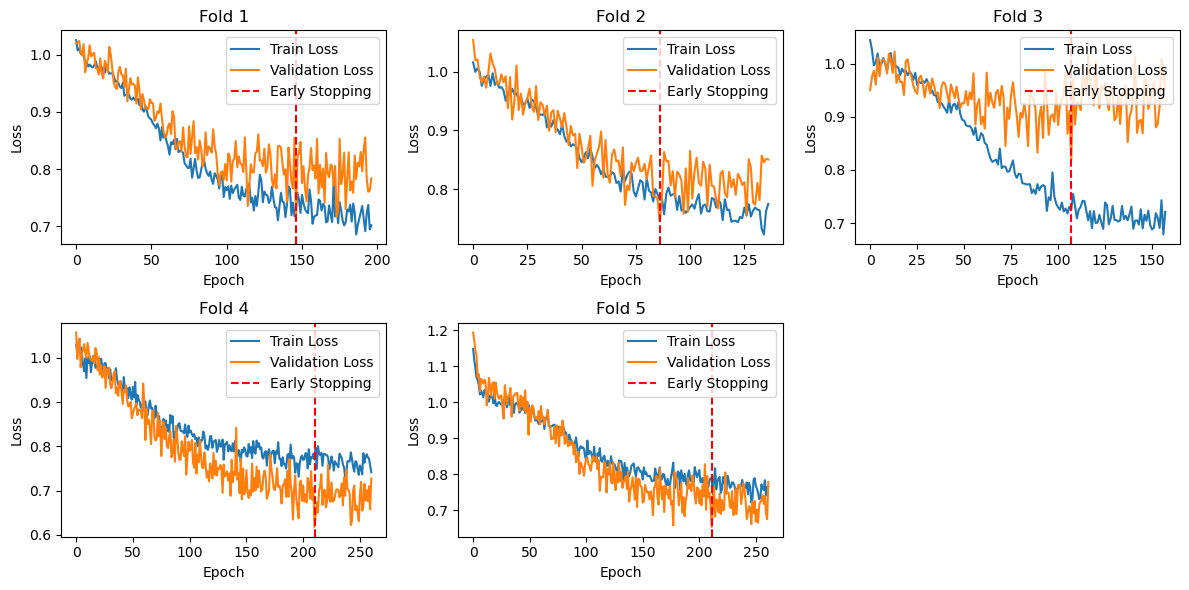

In [20]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.axvline(all_last_indexes[i], color='r', linestyle='--', label='Early Stopping')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


## Testing

In [21]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-mallorca-atp-singles',
                                            'past-eastbourne-atp-singles',
                                            'past-wimbledon-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

if len(new_list_vectors_test) == 0:
    print('No data to predict')
    sys.exit(0)

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-mallorca-atp-singles', 'past-eastbourne-atp-singles', 'past-wimbledon-atp-singles'} ...
... loaded 169 matches
Updating id table ...
... id table updated


  0%|          | 0/3 [00:00<?, ?it/s]

Error 'j0a4' for match U7E4goaE in tournament past-mallorca-atp-singles
Error 'cd85' for match AobhQfMi in tournament past-mallorca-atp-singles
Error 'j0a4' for match 6H1Yv32e in tournament past-mallorca-atp-singles
Error 'mn20' for match Wz3AkBk3 in tournament past-mallorca-atp-singles
Error 'cg07' for match pWxHNmhe in tournament past-mallorca-atp-singles
Error 'j476' for match dlggVvf4 in tournament past-mallorca-atp-singles
Error 'n0dd' for match dCytMzHj in tournament past-mallorca-atp-singles
Error 'gg65' for match x6Z8P9Nr in tournament past-mallorca-atp-singles
Error 'n09u' for match QTpARdgT in tournament past-mallorca-atp-singles
Error 'f664' for match AiJSqv9c in tournament past-mallorca-atp-singles
Error 'sm09' for match 4Ed1TIOG in tournament past-mallorca-atp-singles
Error 'rb56' for match r5HzrIwA in tournament past-mallorca-atp-singles
Error 's0tx' for match zP7wHGi4 in tournament past-eastbourne-atp-singles
Error 'h0dc' for match 2R5mwx66 in tournament past-eastbourne-

100%|██████████| 3/3 [00:00<00:00, 27.27it/s]

Error 'bp41' for match nJ1bzRy1 in tournament past-eastbourne-atp-singles
Error 'h0dc' for match ji8kxm7l in tournament past-eastbourne-atp-singles
Error 's0tx' for match 4fYOjnMs in tournament past-eastbourne-atp-singles
Error 'm0oq' for match fLMJs9qR in tournament past-eastbourne-atp-singles
Error 'ci14' for match 2mPxbjwB in tournament past-wimbledon-atp-singles
Error 'm0tb' for match MwToBJHD in tournament past-wimbledon-atp-singles
Error 'l0cf' for match CbtM7IuP in tournament past-wimbledon-atp-singles
Error 'l0cf' for match CvhFI6in in tournament past-wimbledon-atp-singles
Error 'm0tu' for match lKP2YU4b in tournament past-wimbledon-atp-singles
Error 'm0tb' for match dl3biUhm in tournament past-wimbledon-atp-singles
Error 'g0a0' for match d2rX5T7t in tournament past-wimbledon-atp-singles
Error 'ci14' for match viqWEOjB in tournament past-wimbledon-atp-singles
Error 'd0c3' for match 6w3NoQMO in tournament past-wimbledon-atp-singles
Error 'p0ht' for match IHWu47xg in tournament p

  0%|          | 0/128 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 11
Test Loss: for 1 : 0.86
Test Loss: for 2 : 1.20
Test Loss: for 3 : 0.80
Test Loss: for 4 : 1.33
Test Loss: for 5 : 0.87


## Betting

Match : 48ZmFUDj Bautista-Agut R. - Daniel T., bet on player 1 (model pred = 0.77), amount to bet : 1.18, odds : 1.36, label : 1.00, total amount : 100.42
Match : 48ZmFUDj Bautista-Agut R. - Daniel T., no bet on player 2 (model pred =0.07)
Match : EsqAYsjI Monfils G. - Carballes Baena R., no bet on player 1 (model pred =0.57)
Match : EsqAYsjI Monfils G. - Carballes Baena R., no bet on player 2 (model pred =0.17)
Match : KnQZdyOt Giron M. - Cerundolo F., no bet on player 1 (model pred =0.50)
Match : KnQZdyOt Giron M. - Cerundolo F., no bet on player 2 (model pred =0.23)
Match : QuHS9ZyB Monfils G. - Thiem D., no bet on player 1 (model pred =0.39)
Match : QuHS9ZyB Monfils G. - Thiem D., no bet on player 2 (model pred =0.32)
Match : zJKuAu4j Mannarino A. - Michelsen A., no bet on player 1 (model pred =0.35)
Match : zJKuAu4j Mannarino A. - Michelsen A., no bet on player 2 (model pred =0.36)
Match : IeoFgNYo Norrie C. - Ruusuvuori E., no bet on player 1 (model pred =0.30)
Match : IeoFgNYo N

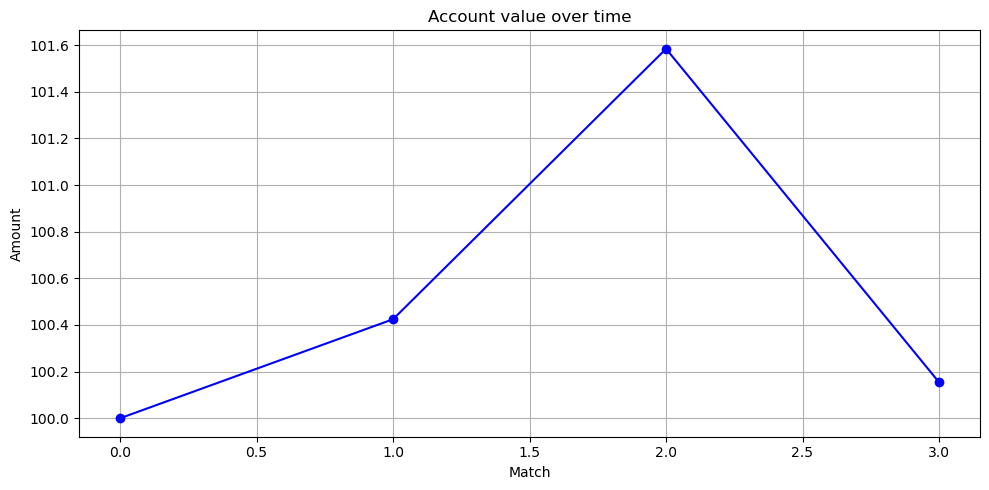

In [22]:
# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds-1)))*safe

test = df.copy()
test['prob_player1'] = ((1+test['predictions'])/2)**1.5
test['prob_player2'] = ((1-test['predictions'])/2)**1.5
# apply keely criterion
test['kelly_criterion_player1'] = test.apply(lambda row : kelly_criterion(row['odds_1'], row['prob_player1']), axis=1)
test['kelly_criterion_player2'] = test.apply(lambda row : kelly_criterion(row['odds_2'], row['prob_player2']), axis=1)

account_values = []

amount = INIT_AMOUNT
account_values.append(amount)
# try the model 
for i, row in test.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    if row['kelly_criterion_player1'] > 0.0 :
        # betting on player 1
        bet = amount * row['kelly_criterion_player1']
        # win or lose
        if row['labels'] == 1:
            amount += bet * (row['odds_1']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred = {row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 (model pred ={row['prob_player1']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else : 
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 1 (model pred ={row['prob_player1']:.2f})")
    if row['kelly_criterion_player2'] > 0.0 :
        # betting on player 2
        bet = amount * row['kelly_criterion_player2']
        # win or lose
        if row['labels'] == -1:
            amount += bet * (row['odds_2']-1)
            print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        else:
            amount -= bet
            print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 (model pred ={row['prob_player2']:.2f}), amount to bet : {bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {amount:.2f}{RESET}")
        account_values.append(amount)
    else :
        print(f"Match : {row['match_id']} {player1} - {player2}, no bet on player 2 (model pred ={row['prob_player2']:.2f})")
print(f"\nTotal amount after betting : {amount:.2f}")
if amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-amount)/INIT_AMOUNT*100:.2f}%{RESET}")

plt.figure(figsize=(10, 5))
plt.plot(account_values, label='Account value', color='blue', marker='o')
plt.xlabel('Match')
plt.ylabel('Amount')
plt.title('Account value over time')
plt.grid()
plt.tight_layout()
plt.show()
# print the results of the strategy


## Autre

In [23]:
CONFIDENCE_THRESHLOLD = 0.6

# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - ((1- prob)/(odds)))*safe

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2 ({row['prediction_prob']:.2f}), amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount >= INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : 48ZmFUDj Bautista-Agut R. - Daniel T., bet on player 1 (0.84), amount to bet : 7.18, odds : 1.36, label : 1.00, total amount : 102.59

Total amount after betting : 102.59
Relative won 2.59%
